In [25]:
%matplotlib inline  
import librosa
import librosa.display
import IPython
import numpy as np
import scipy
from matplotlib import pyplot
import seaborn as sns 
from IPython import display

# Анализ сигнала

In [26]:
filePath = "audio.mp3"
y, sr = librosa.load(filePath)
display.Audio(filePath) 

## Отрисовка сигнала в амплитудно-временной форме

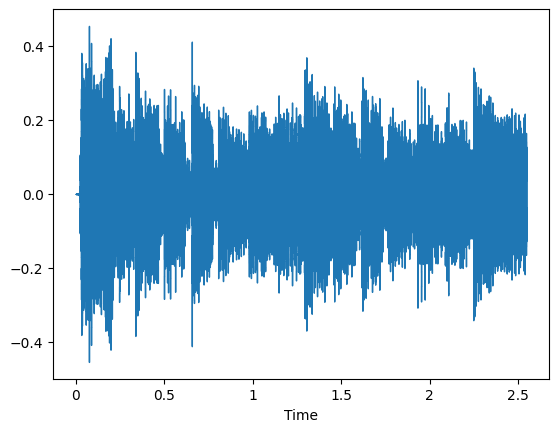

In [27]:
librosa.display.waveshow(y, sr=sr)

## Частотный спектр

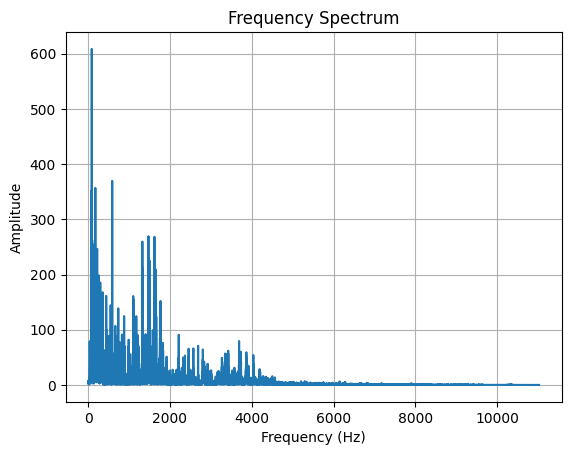

In [28]:
from scipy.fft import fft
spectrum = fft(y)
 
# Frequency bins
frequencies = np.fft.fftfreq(len(spectrum), 1 / sr)

# Plot the frequency spectrum
pyplot.plot(frequencies[:len(frequencies)//2], np.abs(spectrum[:len(spectrum)//2]))
pyplot.xlabel('Frequency (Hz)')
pyplot.ylabel('Amplitude')
pyplot.title('Frequency Spectrum')
pyplot.grid(True)
pyplot.show()


## Спектрограмма

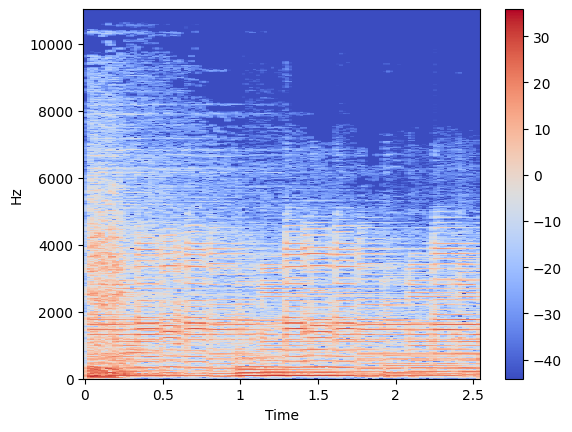

In [29]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
pyplot.colorbar()

# Выделение признаков

## Значение темпа и количество бит

Detected Tempo: [95.703125] beats/min
[1 2 3]


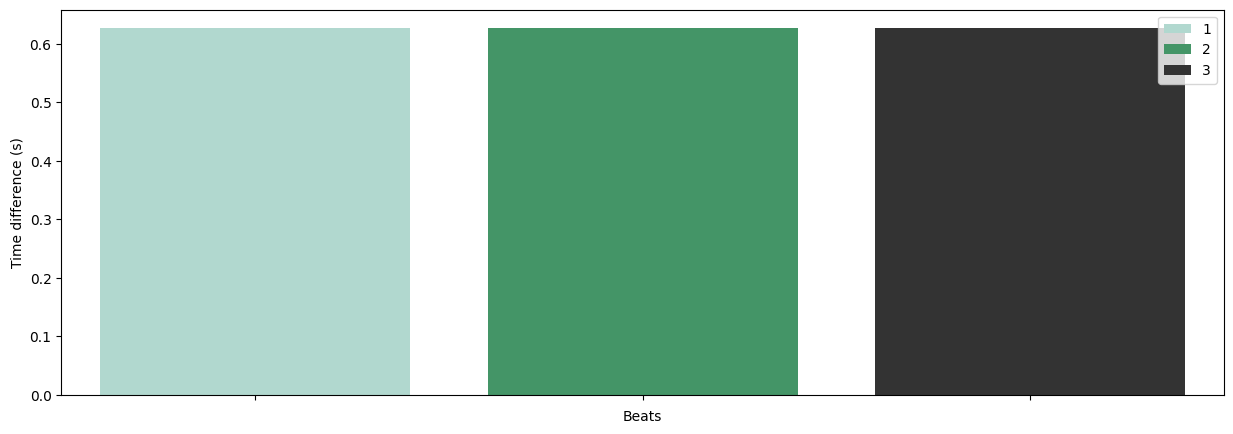

In [30]:
# Beat Extraction
y_harmonic, y_percussive = librosa.effects.hpss(y)
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,sr=sr)
print('Detected Tempo: '+str(tempo)+ ' beats/min')
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_time_diff=np.ediff1d(beat_times)
beat_nums = np.arange(1, np.size(beat_times))

print(beat_nums)

fig, ax = pyplot.subplots()
fig.set_size_inches(15, 5)
ax.set_ylabel("Time difference (s)")
ax.set_xlabel("Beats")
g=sns.barplot(x=beat_nums, y=beat_time_diff, hue=beat_nums, palette="BuGn_d",ax=ax)
g=g.set(xticklabels=[])

Ошибка заключалась в том, что значения на осях x и y являются вторым и третьим аргументом функции barplot, а передавались первыми двумя

## Мел-кепстральные коэффициенты (MFCC)

[[-3.00856659e+02 -1.70390747e+02 -1.40507767e+02 ... -2.19803238e+02
  -2.25685959e+02 -2.23002594e+02]
 [ 1.15909622e+02  1.16604523e+02  1.16621124e+02 ...  1.81509262e+02
   1.81950134e+02  1.92381866e+02]
 [-3.96788521e+01 -4.01168289e+01 -4.11659164e+01 ... -1.10248459e+02
  -1.07609016e+02 -1.02088333e+02]
 ...
 [ 4.99891460e-01  4.82639885e+00  4.82779598e+00 ... -2.34916240e-01
  -1.16147316e+00 -5.53351021e+00]
 [ 7.23134375e+00  6.91845226e+00  5.75808811e+00 ...  5.49379921e+00
   6.16418123e+00  5.10163307e+00]
 [-2.09421253e+00  1.09347594e+00  4.19917870e+00 ... -6.13382912e+00
  -4.76542473e+00 -6.84831262e-01]]


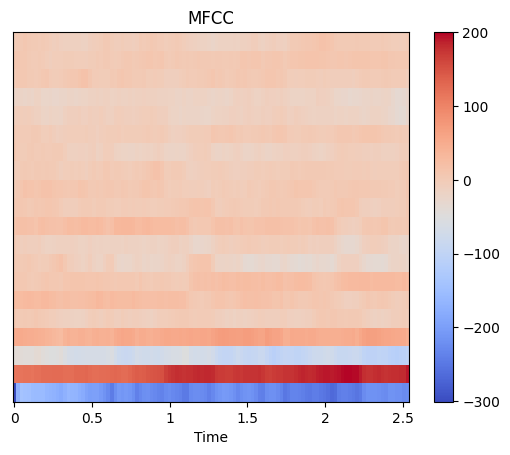

In [31]:
mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=20)
librosa.display.specshow(mfccs, x_axis='time')
pyplot.colorbar()
pyplot.title('MFCC')
print(mfccs)

## Спектральный центроид с сигналом в амплитудно-временной форме

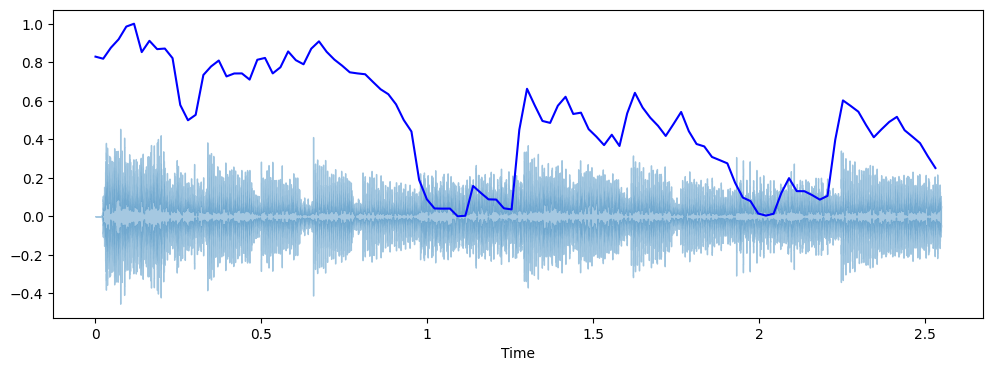

In [32]:
import sklearn

centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
spectral_centroids = centroid[0]

pyplot.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
def normalize(y, axis=0):
    return sklearn.preprocessing.minmax_scale(y, axis=axis)
librosa.display.waveshow(y, sr=sr, alpha=0.4)
pyplot.plot(t, normalize(spectral_centroids), color='b')

# Теоретический вопрос

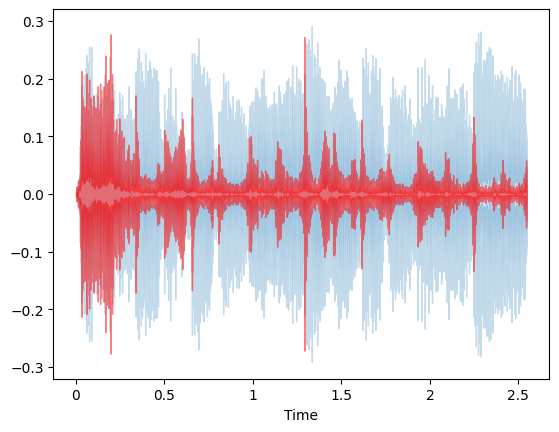

In [36]:
y_harmonic, y_percussive = librosa.effects.hpss(y)
librosa.display.waveshow(y_harmonic, sr=sr, alpha=0.25)
librosa.display.waveshow(y_percussive, sr=sr, color='r', alpha=0.5)

Гармоническая часть сигнала - часть сигнала с фиксированной частотой и примерно равной амплитудой

Перкуссионная часть сигнала - та часть, что представляет из себя резкие колебания звука на короткие периоды времени

При написании музыки, гармонический сигнал зачастую достигается благодаря струнным инструментам, а перкурсионный - благодаря ударным.